# Air transportation Ocurrences
## Analyzing Probabilities 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../scripts")

In [4]:
from data_loader import load_data_from_csv, load_data_from_temp
from common.export_csv import exportDataVersion
import pandas as pd
import numpy as np

In [5]:
#Load data
df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2.csv': {len(df)}")

# of rows 'fullData_V2.csv': 47791


### Probabilities 

In [ ]:
import matplotlib.pyplot as plt

In [76]:
province_probabilities = df.groupby('ProvinceID_DisplayEng').agg({
    'OccID': 'count',  # Número de incidentes
    'DamageLevelID_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'OperationTypeID_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'OperatorTypeID_DisplayEng' : lambda x: x.value_counts(normalize=True).to_dict(),
    'AircraftTypeID_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'InjuriesEnum_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'YearOfManuf': 'mean'  # Edad promedio de aeronaves
}).rename(columns={'OccID': 'IncidentCount'})


#### Marginal Probability of an Accident Occurring in a Specific Province.

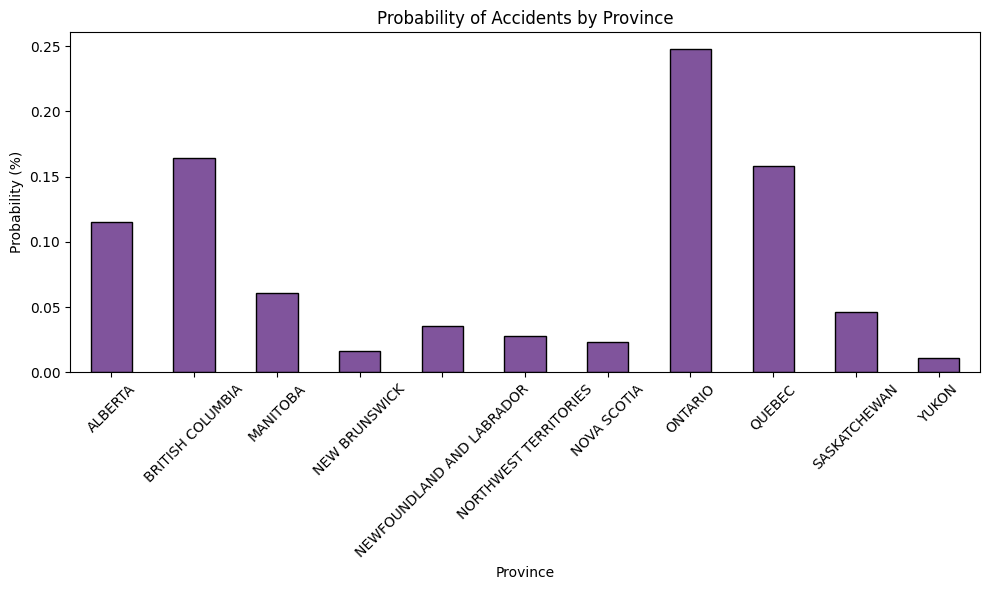

In [33]:
incident_probabilities = province_probabilities['IncidentCount'] / province_probabilities['IncidentCount'].sum()

#Show just provinces that met the requirement 
threshold = 0.01 / incident_probabilities.sum()
filtered_province_probabilities = incident_probabilities[incident_probabilities > threshold]

filtered_province_probabilities.plot(kind='bar', figsize=(10, 6), color='#80549c', edgecolor='black')
plt.title('Probability of Accidents by Province')
plt.xlabel('Province')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
filtered_province_probabilities_df = filtered_province_probabilities.reset_index()
filtered_province_probabilities_df.head(11)

,ProvinceID_DisplayEng,IncidentCount
0,ALBERTA,0.115443
1,BRITISH COLUMBIA,0.163926
2,MANITOBA,0.060996
3,NEW BRUNSWICK,0.016196
4,NEWFOUNDLAND AND LABRADOR,0.035468
5,NORTHWEST TERRITORIES,0.027997
6,NOVA SCOTIA,0.022892
7,ONTARIO,0.248169
8,QUEBEC,0.158464
9,SASKATCHEWAN,0.046474


#### Marginal probability of each damage level in a specific province.

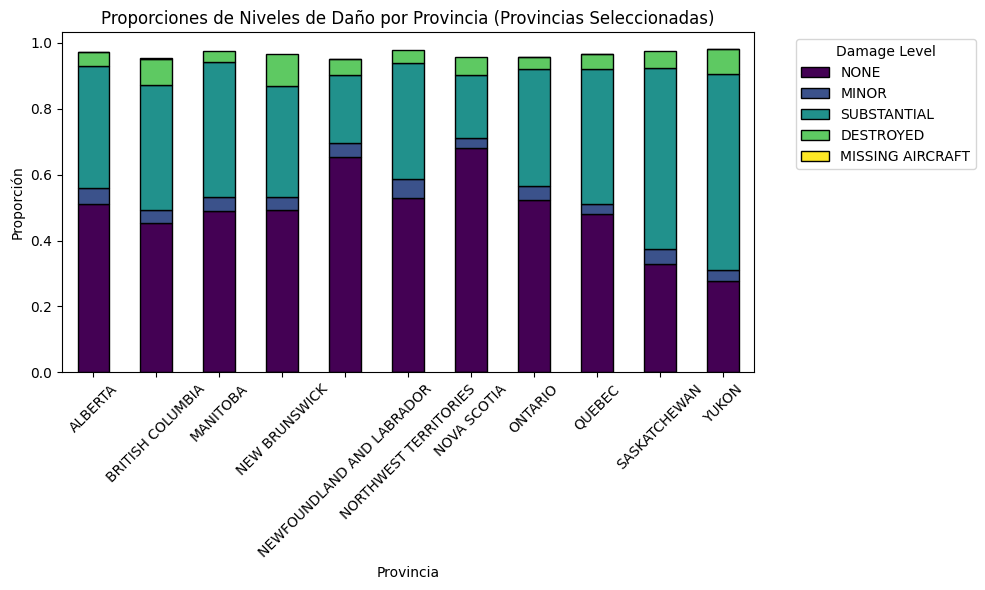

In [46]:
selected_provinces = [
    'ALBERTA', 'BRITISH COLUMBIA', 'MANITOBA', 'NEW BRUNSWICK',
    'NEWFOUNDLAND AND LABRADOR', 'NORTHWEST TERRITORIES',
    'NOVA SCOTIA', 'ONTARIO', 'QUEBEC', 'SASKATCHEWAN', 'YUKON'
]

selected_provinces = [province.upper() for province in selected_provinces]
damage_levels.index = damage_levels.index.str.upper()

damage_levels_filtered = damage_levels.loc[damage_levels.index.intersection(selected_provinces)]
if 'UNKNOWN' in damage_levels_filtered.columns:
    damage_levels_filtered = damage_levels_filtered.drop(columns=['UNKNOWN'])

#Sorting damage level
ordered_columns = ['NONE', 'MINOR', 'SUBSTANTIAL', 'DESTROYED','MISSING AIRCRAFT']
damage_levels_filtered = damage_levels_filtered[ordered_columns]

#Graph
damage_levels_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Marginal probability of each damage level in a specific province')
plt.ylabel('Proportion')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='Damage Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
damage_levels_filtered.head(11)

,NONE,MINOR,SUBSTANTIAL,DESTROYED,MISSING AIRCRAFT
ProvinceID_DisplayEng,,,,,
ALBERTA,0.509697,0.049302,0.370310,0.044046,0.000363
BRITISH COLUMBIA,0.453153,0.038295,0.379627,0.080036,0.003191
MANITOBA,0.490909,0.042882,0.408576,0.033962,0.000000
NEW BRUNSWICK,0.492248,0.041344,0.334625,0.098191,0.000000
NEWFOUNDLAND AND LABRADOR,0.652507,0.043658,0.206490,0.049558,0.000590
NORTHWEST TERRITORIES,0.528401,0.057549,0.352018,0.041854,0.000000
NOVA SCOTIA,0.680987,0.030165,0.192870,0.053931,0.000000
ONTARIO,0.523019,0.044013,0.354300,0.034907,0.000506
QUEBEC,0.481183,0.030635,0.407632,0.047141,0.000132


#### Marginal probability of each type of operation in a specific province

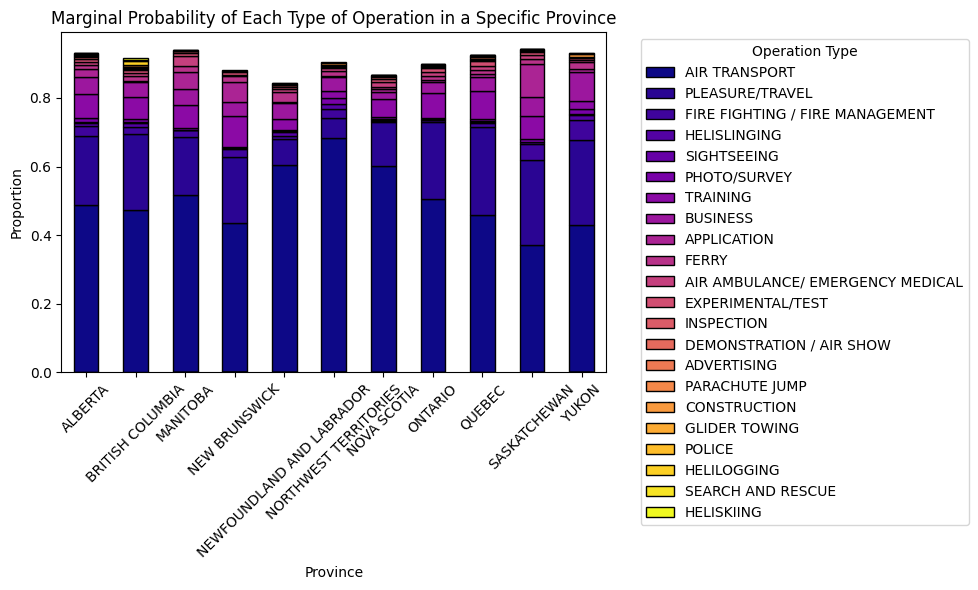

In [66]:
operation_types = pd.DataFrame(province_probabilities['OperationTypeID_DisplayEng'].tolist(),
                               index=province_probabilities.index).fillna(0)

operation_types.index = operation_types.index.str.upper()
operation_types_filtered = operation_types.loc[operation_types.index.intersection(selected_provinces)]

operation_types_filtered = operation_types_filtered.drop(columns=['UNKNOWN', 'OTHER'])
    
operation_types_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma', edgecolor='black')
plt.title('Marginal Probability of Each Type of Operation in a Specific Province')
plt.ylabel('Proportion')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='Operation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [68]:
operation_types_filtered.head(11)

,AIR TRANSPORT,PLEASURE/TRAVEL,FIRE FIGHTING / FIRE MANAGEMENT,HELISLINGING,SIGHTSEEING,PHOTO/SURVEY,TRAINING,BUSINESS,APPLICATION,FERRY,...,INSPECTION,DEMONSTRATION / AIR SHOW,ADVERTISING,PARACHUTE JUMP,CONSTRUCTION,GLIDER TOWING,POLICE,HELILOGGING,SEARCH AND RESCUE,HELISKIING
ProvinceID_DisplayEng,,,,,,,,,,,,,,,,,,,,,
ALBERTA,0.487403,0.200471,0.030995,0.009063,0.002538,0.011057,0.071053,0.048940,0.022476,0.011963,...,0.007250,0.003625,0.002175,0.001450,0.001450,0.000906,0.000725,0.000363,0.000181,0.000000
BRITISH COLUMBIA,0.473449,0.220832,0.021956,0.011871,0.001915,0.008552,0.064080,0.042635,0.005234,0.013148,...,0.002681,0.001915,0.000894,0.002298,0.004595,0.000383,0.001404,0.012382,0.000638,0.008297
MANITOBA,0.516638,0.170497,0.018182,0.001715,0.001029,0.005146,0.066895,0.045283,0.050086,0.016467,...,0.003774,0.001029,0.000686,0.001372,0.001029,0.000686,0.000000,0.000000,0.000000,0.000000
NEW BRUNSWICK,0.436693,0.192506,0.023256,0.001292,0.001292,0.001292,0.090439,0.042636,0.058140,0.016796,...,0.000000,0.002584,0.001292,0.000000,0.000000,0.000000,0.002584,0.000000,0.000000,0.000000
NEWFOUNDLAND AND LABRADOR,0.604130,0.075516,0.008850,0.012979,0.001180,0.005310,0.029499,0.046608,0.003540,0.029499,...,0.004130,0.000590,0.001770,0.000000,0.002950,0.000000,0.000590,0.000000,0.001180,0.000000
NORTHWEST TERRITORIES,0.683109,0.059043,0.026158,0.012706,0.000000,0.019432,0.018685,0.042601,0.001495,0.014200,...,0.002990,0.000000,0.002990,0.000000,0.005979,0.000000,0.000747,0.000000,0.000000,0.000000
NOVA SCOTIA,0.601463,0.129799,0.000914,0.004570,0.000914,0.005484,0.053016,0.021938,0.009141,0.004570,...,0.005484,0.003656,0.000914,0.000914,0.000914,0.000914,0.000000,0.000000,0.000914,0.000000
ONTARIO,0.506408,0.222513,0.005987,0.002108,0.001686,0.003035,0.072091,0.032462,0.006661,0.012142,...,0.001180,0.002445,0.001433,0.002024,0.000759,0.001433,0.000590,0.000000,0.000084,0.000000
QUEBEC,0.458471,0.257890,0.009904,0.003565,0.002641,0.007131,0.080285,0.040011,0.009375,0.010828,...,0.003301,0.001188,0.005414,0.001849,0.002773,0.000924,0.000792,0.000132,0.000660,0.000000


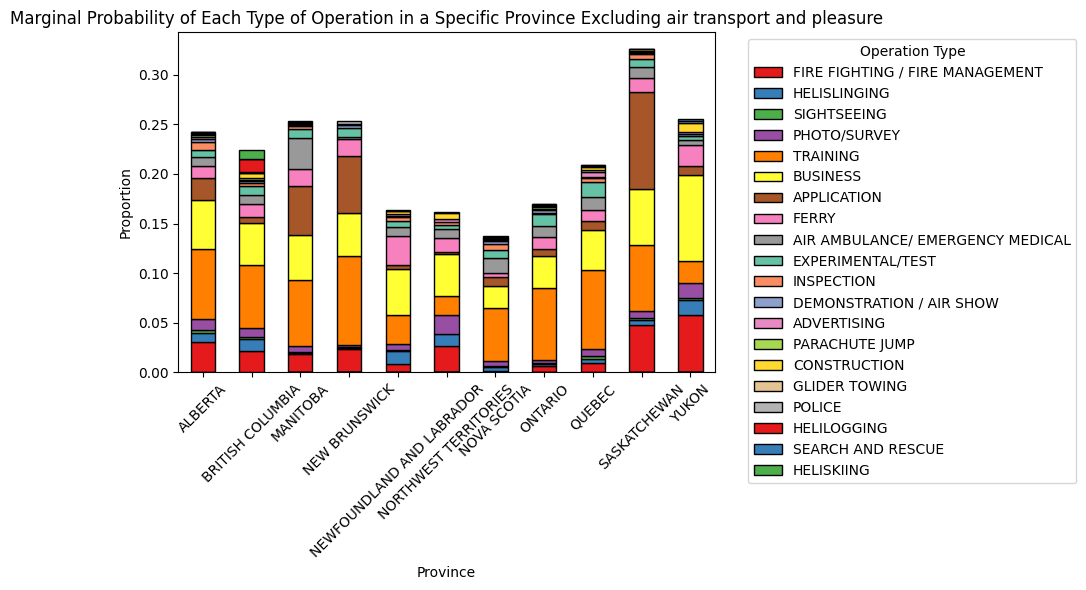

In [72]:
color_palette = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', 
                 '#ffff33', '#a65628', '#f781bf', '#999999', '#66c2a5', 
                 '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', 
                 '#e5c494', '#b3b3b3']

operation_types = pd.DataFrame(province_probabilities['OperationTypeID_DisplayEng'].tolist(),
                               index=province_probabilities.index).fillna(0)

operation_types.index = operation_types.index.str.upper()
operation_types_filtered = operation_types.loc[operation_types.index.intersection(selected_provinces)]
operation_types_filtered = operation_types_filtered.drop(columns=['UNKNOWN', 'OTHER', 'AIR TRANSPORT', 'PLEASURE/TRAVEL'])
    
operation_types_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=color_palette, edgecolor='black')
plt.title('Marginal Probability of Each Type of Operation in a Specific Province Excluding air transport and pleasure')
plt.ylabel('Proportion')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='Operation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
operation_types_filtered.head(11)

,FIRE FIGHTING / FIRE MANAGEMENT,HELISLINGING,SIGHTSEEING,PHOTO/SURVEY,TRAINING,BUSINESS,APPLICATION,FERRY,AIR AMBULANCE/ EMERGENCY MEDICAL,EXPERIMENTAL/TEST,INSPECTION,DEMONSTRATION / AIR SHOW,ADVERTISING,PARACHUTE JUMP,CONSTRUCTION,GLIDER TOWING,POLICE,HELILOGGING,SEARCH AND RESCUE,HELISKIING
ProvinceID_DisplayEng,,,,,,,,,,,,,,,,,,,,
ALBERTA,0.030995,0.009063,0.002538,0.011057,0.071053,0.048940,0.022476,0.011963,0.008882,0.007613,0.007250,0.003625,0.002175,0.001450,0.001450,0.000906,0.000725,0.000363,0.000181,0.000000
BRITISH COLUMBIA,0.021956,0.011871,0.001915,0.008552,0.064080,0.042635,0.005234,0.013148,0.009701,0.009063,0.002681,0.001915,0.000894,0.002298,0.004595,0.000383,0.001404,0.012382,0.000638,0.008297
MANITOBA,0.018182,0.001715,0.001029,0.005146,0.066895,0.045283,0.050086,0.016467,0.031561,0.008576,0.003774,0.001029,0.000686,0.001372,0.001029,0.000686,0.000000,0.000000,0.000000,0.000000
NEW BRUNSWICK,0.023256,0.001292,0.001292,0.001292,0.090439,0.042636,0.058140,0.016796,0.002584,0.009044,0.000000,0.002584,0.001292,0.000000,0.000000,0.000000,0.002584,0.000000,0.000000,0.000000
NEWFOUNDLAND AND LABRADOR,0.008850,0.012979,0.001180,0.005310,0.029499,0.046608,0.003540,0.029499,0.009440,0.005900,0.004130,0.000590,0.001770,0.000000,0.002950,0.000000,0.000590,0.000000,0.001180,0.000000
NORTHWEST TERRITORIES,0.026158,0.012706,0.000000,0.019432,0.018685,0.042601,0.001495,0.014200,0.008969,0.004484,0.002990,0.000000,0.002990,0.000000,0.005979,0.000000,0.000747,0.000000,0.000000,0.000000
NOVA SCOTIA,0.000914,0.004570,0.000914,0.005484,0.053016,0.021938,0.009141,0.004570,0.014625,0.008227,0.005484,0.003656,0.000914,0.000914,0.000914,0.000914,0.000000,0.000000,0.000914,0.000000
ONTARIO,0.005987,0.002108,0.001686,0.003035,0.072091,0.032462,0.006661,0.012142,0.011298,0.012226,0.001180,0.002445,0.001433,0.002024,0.000759,0.001433,0.000590,0.000000,0.000084,0.000000
QUEBEC,0.009904,0.003565,0.002641,0.007131,0.080285,0.040011,0.009375,0.010828,0.013337,0.015186,0.003301,0.001188,0.005414,0.001849,0.002773,0.000924,0.000792,0.000132,0.000660,0.000000


#### Marginal probability of each type of operator type in a specific province

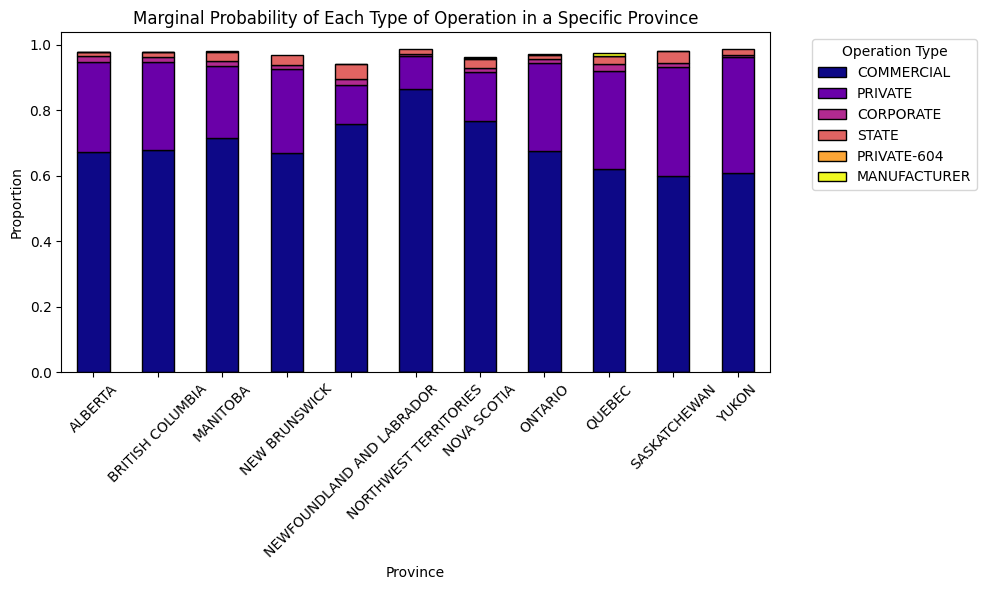

In [80]:
operator_types = pd.DataFrame(province_probabilities['OperatorTypeID_DisplayEng'].tolist(),
                               index=province_probabilities.index).fillna(0)

# Filtrar por provincias seleccionadas
operator_types.index = operator_types.index.str.upper()
operator_types_filtered = operator_types.loc[operator_types.index.intersection(selected_provinces)]

operator_types_filtered = operator_types_filtered.drop(columns=['UNKNOWN', 'OTHER'])
    
#Graph
operator_types_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma', edgecolor='black')
plt.title('Marginal Probability of Each Type of Operation in a Specific Province')
plt.ylabel('Proportion')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='Operation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
operator_types_filtered.head(11)

,COMMERCIAL,PRIVATE,CORPORATE,STATE,PRIVATE-604,MANUFACTURER
ProvinceID_DisplayEng,,,,,,
ALBERTA,0.673192,0.275875,0.016494,0.011238,0.001088,0.000906
BRITISH COLUMBIA,0.677687,0.269977,0.015828,0.013148,0.000255,0.000511
MANITOBA,0.715609,0.220926,0.012693,0.029503,0.000000,0.002058
NEW BRUNSWICK,0.669251,0.257106,0.011628,0.032300,0.000000,0.000000
NEWFOUNDLAND AND LABRADOR,0.759292,0.117404,0.019469,0.044838,0.000000,0.001770
NORTHWEST TERRITORIES,0.865471,0.101644,0.005979,0.012706,0.000000,0.000000
NOVA SCOTIA,0.766910,0.150823,0.010969,0.029250,0.000914,0.002742
ONTARIO,0.674705,0.268381,0.012310,0.014418,0.000000,0.001602
QUEBEC,0.621418,0.297504,0.024033,0.024033,0.000132,0.009111


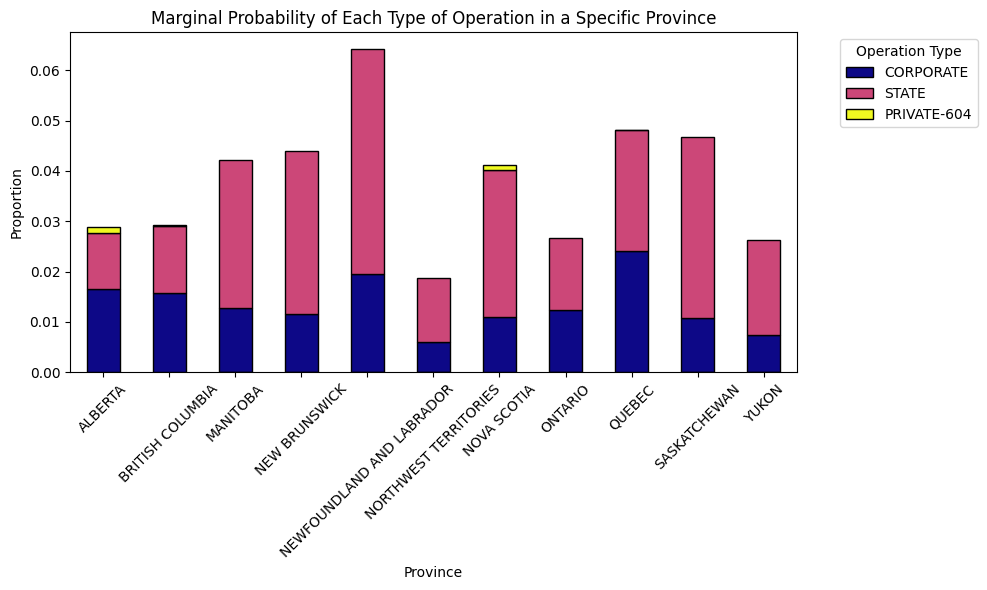

In [86]:
operator_types_filtered = operator_types_filtered.drop(columns=['COMMERCIAL', 'PRIVATE', 'MANUFACTURER'])
    
#Graph
operator_types_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma', edgecolor='black')
plt.title('Marginal Probability of Each Type of Operation in a Specific Province')
plt.ylabel('Proportion')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='Operation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Marginal probability of each aircraft type in a specific province

#### Marginal probability of each type of injury in a specific province.

#### Average age of aircraft involved in incidents in a specific province.

### Joint probabilities 

In [ ]:
joint_probabilities = pd.crosstab(
    df['OccIncidentTypeID_DisplayEng'], 
    df['InjuriesEnum_DisplayEng'], 
    normalize=True
)

# Mostrar resultados
print("Probabilidades conjuntas entre tipo de incidente y lesiones:")
print(joint_probabilities)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap de ejemplo (para la idea 2)
sns.heatmap(joint_probabilities, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Probabilidades conjuntas: Tipo de incidente vs Lesiones")
plt.show()


### Conditional Probabilities 

In [ ]:
# Calcular la probabilidad condicional del nivel de daño dado el tipo de aeronave
conditional_probabilities = pd.crosstab(
    df['AircraftTypeID_DisplayEng'], 
    df['DamageLevelID_DisplayEng'], 
    normalize='index'  # Normalizar por fila para obtener probabilidades condicionales
)

# Mostrar resultados
print("Probabilidades condicionales del nivel de daño dado el tipo de aeronave:")
print(conditional_probabilities)


#### Expected Number of Accidents Per Aircraft Type

In [ ]:
aircraft_counts = df['AircraftTypeID_DisplayEng'].value_counts()
expected_value = (aircraft_counts / aircraft_counts.sum()).dot(aircraft_counts)
print(f"Expected number of accidents per aircraft type: {expected_value}")

#### Joint Probability Table for Injuries and Damage Levels

In [ ]:
joint_prob = pd.crosstab(df['InjuriesEnum_DisplayEng'], df['DamageLevelID_DisplayEng'], normalize=True)
print(joint_prob)


#### Binomial Distribution for Injuries

In [ ]:
from scipy.stats import binom

In [ ]:
n_trials = len(df)
p_injuries = (df['InjuriesEnum_DisplayEng'] == 'Yes').mean()

# Probability of 0 to n_trials injuries
x = range(n_trials + 1)
probabilities = binom.pmf(x, n_trials, p_injuries)
print(probabilities)

#### Poisson Distribution for Accident Counts

In [ ]:
from scipy.stats import poisson

In [ ]:
df['Year'] = pd.to_datetime(df['OccDate']).dt.year
yearly_accidents = df.groupby('Year').size()

# Fit Poisson distribution
mean_accidents = yearly_accidents.mean()
poisson_probs = poisson.pmf(range(0, max(yearly_accidents) + 1), mean_accidents)
print(poisson_probs)

#### Bayesian Analysis for Aircraft Types

In [ ]:
from scipy.stats import bayes_mvs

In [ ]:
incident_aircraft = df.groupby(['OccIncidentTypeID_DisplayEng', 'AircraftMakeID_DisplayEng']).size()
prob_incident_given_aircraft = incident_aircraft.div(incident_aircraft.sum(level=1), level=1)
print(prob_incident_given_aircraft)

#### Variance and Standard Deviation of Manufacturing Years

In [ ]:
variance = df['YearOfManuf'].var()
std_dev = df['YearOfManuf'].std()
print(f"Variance: {variance}, Standard Deviation: {std_dev}")

#### Comparison of Provinces Using Triangular Distributions

In [ ]:
from scipy.stats import triang

In [ ]:
province_counts = df['ProvinceID_DisplayEng'].value_counts()
a, b, c = province_counts.min(), province_counts.median(), province_counts.max()

# Fit triangular distribution
tri_dist = triang(c=(b - a) / (c - a), loc=a, scale=(c - a))
print(tri_dist.mean(), tri_dist.var())

#### Analysis of Operation Types with Normal Distribution

In [ ]:
from scipy.stats import norm

In [ ]:
operation_counts = df['OperationTypeID_DisplayEng'].value_counts()
mu, sigma = operation_counts.mean(), operation_counts.std()

# Plotting normal distribution
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.title("Normal Distribution of Operation Types")
plt.show()


#### Expected Damage Level by Aircraft Weight

In [ ]:
damage_mapping = {'NONE': 0, 'MINOR': 1, 'SUBSTANTIAL': 2}
df['DamageLevelNumeric'] = df['DamageLevelID_DisplayEng'].map(damage_mapping)

expected_damage = df.groupby('WeightCategoryID_DisplayEng')['DamageLevelNumeric'].mean()
print(expected_damage)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(joint_prob, annot=True, cmap="YlGnBu")
plt.title("Joint Probability Heatmap")
plt.show()